In [8]:
import numpy as np
from typing import *
from GaussNewton_line import *
from Levenberg_Marquardt_yq import *
from cookbook import *
import numpy.typing as npt

In [2]:
def rJ(x: Union[list, np.ndarray]):
    r = np.array([x[0], (10*x[0]) / (x[0] + 0.1) + 2*x[1]**2])
    J = np.array([[1, 0],[10/(x[0] + 0.1) - (10*x[0]) / ((x[0]+0.1)**2), 4*x[1]]])
    
    return r, J

# 5

## 5 a)

The Gauss-Newton iteration step is 
$$
\bold x_{k+1} = \bold x_k-(J(\bold x_k)^TJ(\bold x_k))^{-1}J(\bold x_k)^T\bold r(\bold x_k)
$$

Since the Jacobian is a square, non-singular matrix, we can distribute the inverse
$$
\bold x_{k+1} = \bold x_k-J(\bold x_k)^{-1}(J(\bold x_k)^T)^{-1}J(\bold x_k)^T\bold r(\bold x_k)
$$

The inverse of the transpose and the transpose cancel out leaving us with the Newton step
$$
\bold x_{k+1} = \bold x_k-J(\bold x_k)^{-1}\bold r(\bold x_k)
$$


## 5 b)

We can still use Gauss-Newton if it's not square as we are using the pseudo-inverse which work for non-square matrices.

## 5 c)

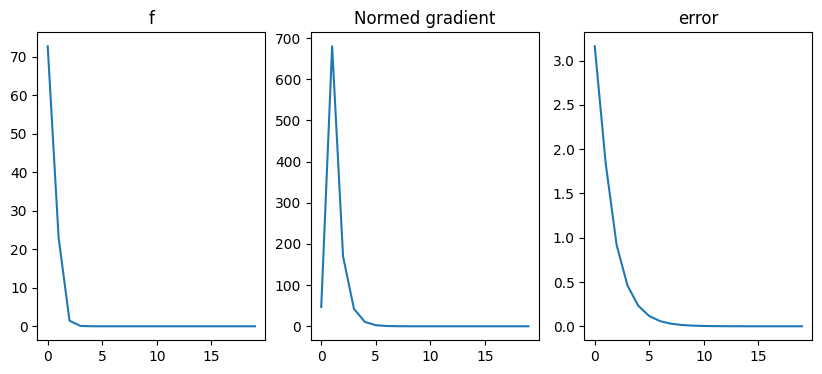

In [3]:
x0 = np.array([3, 1])
x_star = np.array([0, 0])
x, stats = GaussNewton_line_md(rJ, x0, 0)
errors = get_errors(stats["X"], x_star)
plot_opt_stats(stats, errors)


# 7

## 7 a)

$$J = \begin{bmatrix}
1 & 0\\
\frac{10}{z_1+0.1}-\frac{10z_1}{(z_1+0.1)^2} & 2
\end{bmatrix}

This Jacobian is non-singular since the determinant is 2 for every **z**. 

## 7 b)

In [10]:
def rJ(z: npt.NDArray) -> (npt.NDArray, npt.NDArray):
    r = np.array([z[0], 10*z[0] / (z[0] + 0.1) + 2*z[1]])
    J = np.array([[1, 0], [10/(z[0]+0.1) - 10*z[0]/(z[0] + 0.1)**2, 2]])
    return r, J

z0 = np.array([3, 1])
_, J0 = rJ(z0)
tau = 10e-16
z, stats = Levenberg_Marquardt_yq(rJ, z0, tau)

In [11]:
stats

{'converged': True,
 'iter': 2,
 'X': array([[ 3.00000000e+00,  1.00000000e+00],
        [ 1.19904087e-14, -4.68262227e+00],
        [ 9.78369029e-13, -4.89235319e-11]]),
 'F': array([7.26810614e+01, 4.38539026e+01, 4.78654600e-25]),
 'dF': array([[ 4.21513209e+00,  2.33548387e+01],
        [-9.36524454e+02, -1.87304891e+01],
        [-3.77153470e-14, -2.03216875e-14]]),
 'nfun': 3}

# Rosenbrock problem

In [ ]:
def rJ_Rosen(x: npt.NDArray) -> tuple(npt.NDArray, npt.NDArray):
    r = np.sqrt(2) * np.array([10*(x[1] - x[0]**2), [1 - x[0]]])
    J = np.array([[-20*x[0], 10], [-1, 0]])
    return r, J